In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/DS:Deep Learning in Python/NN -Fundamental concepts from scratch')

In [0]:
from __future__ import print_function, division
from builtins import range

from keras.models import Sequential
from keras.layers import Dense, Activation
from util import get_normalized_data, y2indicator
import matplotlib.pyplot as plt


In [5]:
Xtrain, Xtest, Ytrain, Ytest = get_normalized_data() #get the data

Reading in and transforming data


In [0]:
#get shapes
N, D = Xtrain.shape
K = len(set(Ytrain))

Ytrain = y2indicator(Ytrain)
Ytest = y2indicator(Ytest)

In [8]:
#the model will be of sequential layers
model = Sequential()

In [10]:
#ANN with layers [784] --> [500] --> [10]
model.add(Dense(units=500, input_dim=D))
model.add(Activation('relu'))
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=15, batch_size=32)
print("Returned:", r)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 41000 samples, validate on 1000 samples
Epoch 1/15





41000/41000 [==============================] - 16s 395us/step - loss: 0.6480 - acc: 0.7568 - val_loss: 0.4261 - val_acc: 0.8500
Epoch 2/15
41000/41000 [==============================] - 7s 159us/step - loss: 0.2902 - acc: 0.9235 - val_loss: 0.2055 - val_acc: 0.9520
Epoch 3/15
41000/41000 [==============================] - 7s 161us/step - loss: 0.1852 - acc: 0.9549 - val_loss: 0.2048 - val_acc: 0.9490
Epoch 4/15
41000/41000 [==============================] - 7s 168us/step - loss: 0.1495 - acc: 0.9628 - val_loss: 0.1754 - val_acc: 0.9560
Epoch 5/15
41000/41000 [==============================] - 7s 173us/step - loss: 0.1321 - acc: 0.9681 - val_loss: 0.1613 - val_acc: 0.9560
Epoch 6/15
41000/41000 [==============================] - 7s 163us/step - loss: 0.1102 - acc: 0.9743 - val_loss: 0.1774 - val_acc: 0.9500
Epoch 7/15
41000/410

In [12]:
#print available keys
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


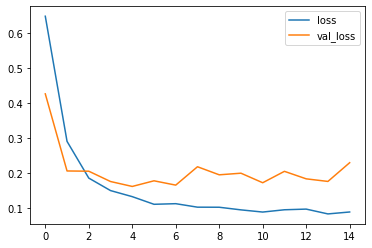

In [14]:
#plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

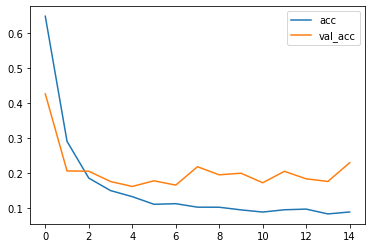

In [15]:
#accuracies
plt.plot(r.history['loss'], label='acc')
plt.plot(r.history['val_loss'], label = 'val_acc')
plt.legend()
plt.show()